# Gradient Descent

Hemos encontrado el mínimo de la función de costo igualando su gradiente a cero.
El la complejidad computacional de este algoritmo está en el orden de $O(n^3)$, lo cual hace que este algoritmo sea impracticable para un gran volumen de datos.

Una alternativa es encontrar el mínimo de la función de costo iterativamente. Esto lo podemos hacer basándonos en los siguientes conceptos:

* Inicializamos los parámetros del modelo con un valor aleatorio: $\mathbf{b}(0)$
* El gradiente de la función de costo evaluado en un punto particular, nos dará la dirección de máxima variación de la función de costo. Es decir, si yo muevo al vector de parámetros en la dirección de máxima variación, el valor de la función de costo subirá a la tasa mas alta posible.
* Al contrario, si muevo al vector de parámetros en la dirección contraria, el valor de la función de costo bajará a la tasa mas alta posible: 
* Muevo los pesos muy poco en la dirección contraria a la del gradiente y vuelvo a calcular el gradiente en ese punto. $\mathbf{b}(k+1)=\mathbf{b}(k)-2\alpha\nabla(J(\mathbf{b}))$.
* Podemos terminar este proceso iterativo cuando $J$ sea mas chico que un valor deseado, o luego de un número de iteraciones fijo.

<img src="grad.png" alt="Mountain View" style="width:600px;height:400px;">

A este proceso para hallar el mínimo de una función se lo conoce como Batch Gradient Descent.
Para cada peso en particular, lo podemos actualizar como:

$$\beta_i(k+1)=\beta_i(k)-\alpha\frac{1}{N}\sum_{j=0}^N(\hat \beta \mathbf x^{(j)}-y^{(j)})x^{(j)}_i$$

In [80]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# this allows plots to appear directly in the notebook
%matplotlib inline

In [81]:
# read data into a DataFrame
df = pd.read_csv("http://www.stat.ufl.edu/~winner/data/lsd.dat", sep="   ", header=None, names=["Tissue Concentration","Math Score"],engine="python")
print(df.head())

   Tissue Concentration  Math Score
0                  1.17       78.93
1                  2.97       58.20
2                  3.26       67.47
3                  4.69       37.47
4                  5.83       45.65


In [82]:
X=np.array([np.ones(df.values.shape[0]),(df.values[:,0])])
y=df.values[:,1] #Grafico los valores que leí
i=df.shape[0]
print("Cantidad de mediciones:" + str(i))
print("X=" + str(X))
print("y=" + str(y))

Cantidad de mediciones:7
X=[[ 1.    1.    1.    1.    1.    1.    1.  ]
 [ 1.17  2.97  3.26  4.69  5.83  6.    6.41]]
y=[ 78.93  58.2   67.47  37.47  45.65  32.92  29.97]


In [83]:
beta=np.random.rand(2)*16 #Defino los pesos iniciales
#beta=[0,-15] 
alfa=0.005

In [84]:
# Itero y me guardo el valor de los pesos paso a paso
beta_back=np.zeros((3,10000))
for l in range(10000):
    beta_back[:,l]=np.append(beta,((np.dot(beta,X)-y)**2).sum())
    beta=beta-1/7*alfa*((np.dot(beta,X)-y)*X).sum(axis=1)

(100, 780)


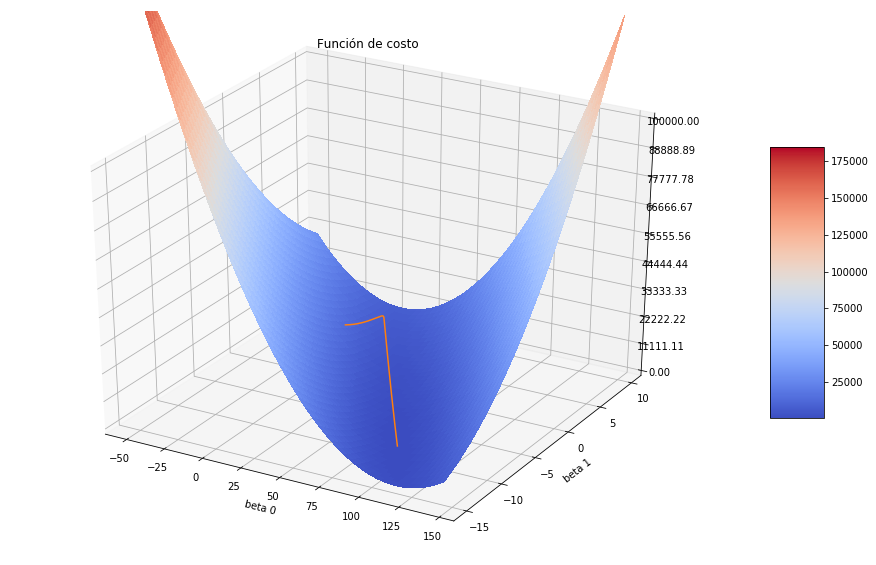

In [85]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize=(16,10))
ax = fig.gca(projection='3d')

# Make data.
beta0 = np.arange(-50, 145, 0.25)
beta1 = np.arange(-15, 10, 0.25)
beta0,beta1 = np.meshgrid(beta0, beta1)
J=[(beta0+beta1*df.values[i,0]-df.values[i,1])**2 for i in range(df.shape[0])]
J=np.array(J)
J=J.sum(axis=0)        
print(J.shape)
# Plot the surface.
surf = ax.plot_surface(beta0, beta1, J, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.plot(beta_back[0,:],beta_back[1,:],beta_back[2,:])
ax.set_xlabel('beta 0')
ax.set_ylabel('beta 1')
ax.set_title('Función de costo')
#ax.scatter([])
# Customize the z axis.
ax.set_zlim(0, 100000)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

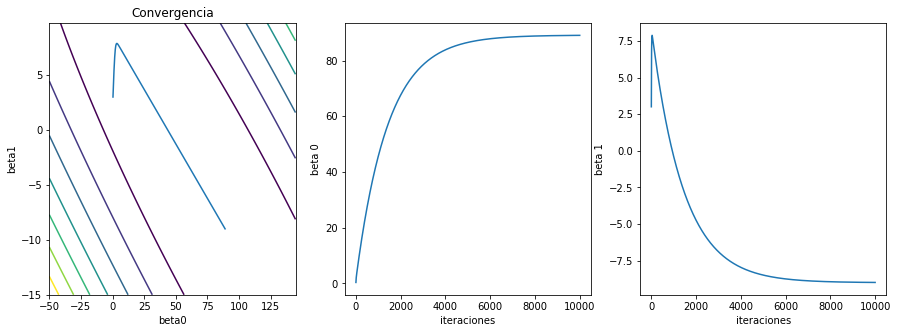

In [86]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))
ax1.contour(beta0, beta1, J)
ax1.set_title('Convergencia')
ax1.set_xlabel('beta0')
ax1.set_ylabel('beta1')
ax1.plot(beta_back[0,:],beta_back[1,:])
ax2.plot(beta_back[0,:])
ax2.set_xlabel('iteraciones')
ax2.set_ylabel('beta 0')
ax3.plot(beta_back[1,:])
ax3.set_xlabel('iteraciones')
ax3.set_ylabel('beta 1')
plt.show()

## Stochastic Gradient Descent

Stochastic Gradient Descent es una simplificación de Batch Gradient Descent.
La misma consiste en reemplazar la función de costo total (la cual es el error cuadrático medio calculado para todo el set de muestras) por el error cuadrático instantáneo. Si hacemos esto, las ecuaciones de actualización de los pesos nos quedarán:

$$\beta_i(k+1)=\beta_i(k)-\alpha (\hat \beta \mathbf x^{(k)}-y^{(k)})x^{(k)}_i$$

El criterio de corte podrá ser por cantidad de iteraciones, o si el errór cuadrático instantáneo de todo un batch se mantiene por debajo de un valor predeterminado.


In [87]:
beta=np.random.rand(2)*16 #Defino los pesos iniciales
beta=[0,-15] 
alfa=0.01
beta

[0, -15]

In [88]:
# Itero y me guardo el valor de los pesos paso a paso
beta_back=np.zeros((3,14000))
for l in range(2000):
    for k in range(7):
        beta_back[:,l*7+k]=np.append(beta,((np.dot(beta,X)-y)**2).sum())
        beta=beta-alfa*((np.dot(beta,X[:,k])-y[k])*X[:,k])

(100, 780)


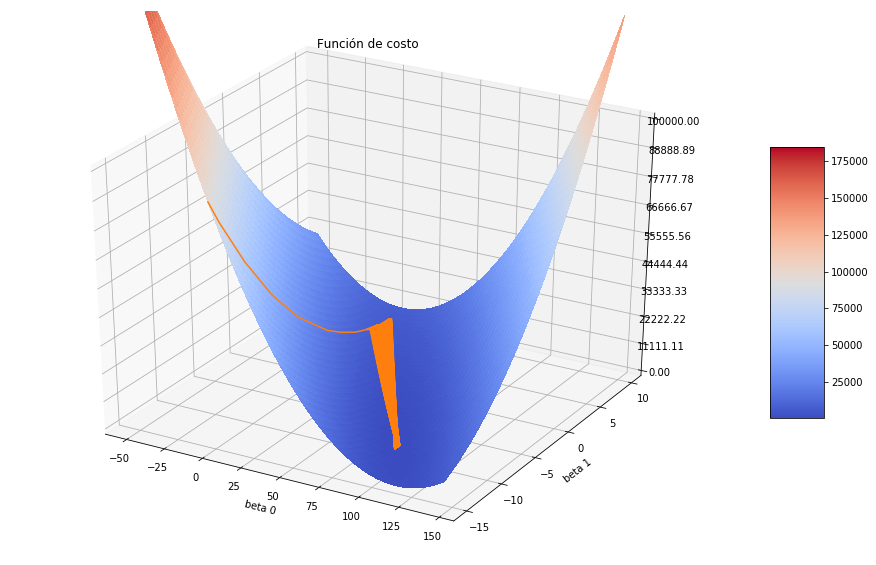

In [89]:
fig = plt.figure(figsize=(16,10))
ax = fig.gca(projection='3d')

# Make data.
beta0 = np.arange(-50, 145, 0.25)
beta1 = np.arange(-15, 10, 0.25)
beta0,beta1 = np.meshgrid(beta0, beta1)
J=[(beta0+beta1*df.values[i,0]-df.values[i,1])**2 for i in range(df.shape[0])]
J=np.array(J)
J=J.sum(axis=0)        
print(J.shape)
# Plot the surface.
surf = ax.plot_surface(beta0, beta1, J, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.plot(beta_back[0,:],beta_back[1,:],beta_back[2,:])
#ax.scatter([])
# Customize the z axis.
ax.set_xlabel('beta 0')
ax.set_ylabel('beta 1')
ax.set_title('Función de costo')
ax.set_zlim(0, 100000)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

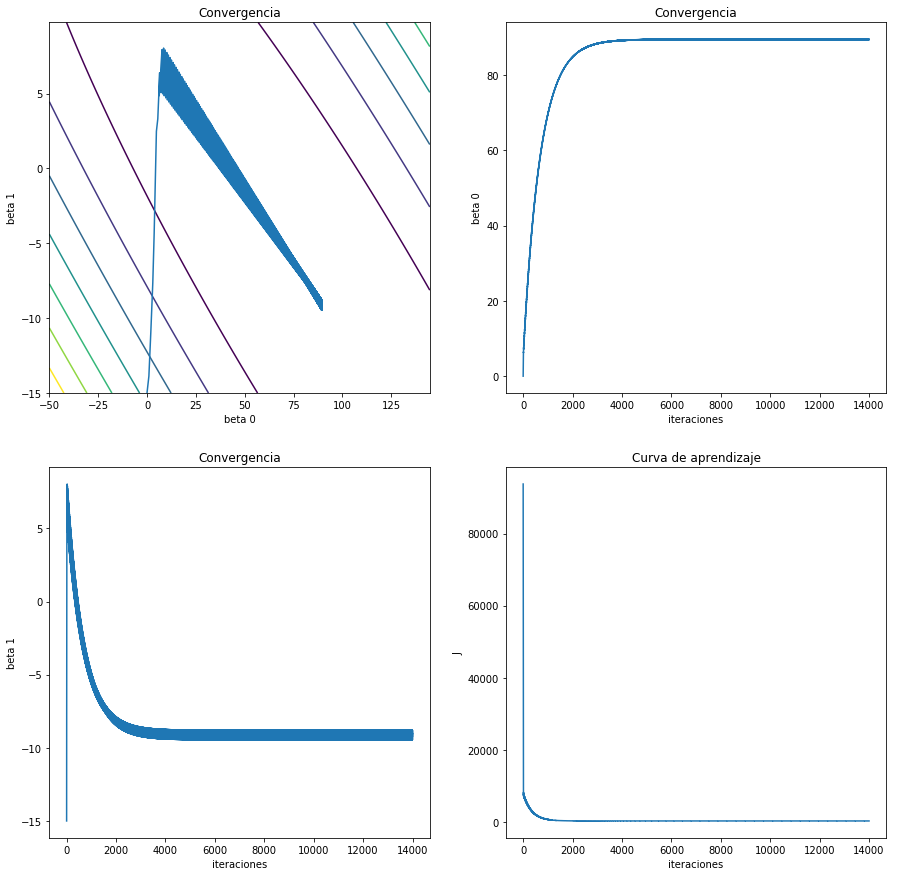

In [90]:
f, (ax1, ax2) = plt.subplots(2,2,figsize=(15,15))
ax1[0].contour(beta0, beta1, J)
ax1[0].plot(beta_back[0,:],beta_back[1,:])
ax1[0].set_title('Convergencia')
ax1[0].set_xlabel('beta 0')
ax1[0].set_ylabel('beta 1')
ax1[1].plot(beta_back[0,:])
ax1[1].set_title('Convergencia')
ax1[1].set_ylabel('beta 0')
ax1[1].set_xlabel('iteraciones')
ax2[0].plot(beta_back[1,:])
ax2[0].set_title('Convergencia')
ax2[0].set_ylabel('beta 1')
ax2[0].set_xlabel('iteraciones')
ax2[1].plot(beta_back[2,:])
ax2[1].set_title('Curva de aprendizaje')
ax2[1].set_ylabel('J')
ax2[1].set_xlabel('iteraciones')
plt.show()

In [91]:
beta

array([ 89.49926652,  -9.13454091])

Para grandes volúmenes de datos se puede aplicar una solución intermedia que consiste en dividir el batch en fracciones llamadas epochs.

## Gradient Descent utilizando sklearn

In [98]:
X=np.array(3000*X.T[:,1].tolist())
Y=np.array(3000*y.tolist())

IndexError: too many indices for array

In [99]:
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor()
clf.fit(X, Y.T)

/home/cselmo/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 21000]

In [94]:
len(X)

21000

In [95]:
len(Y)

21000

In [96]:
clf.intercept_

In [97]:
clf.coef_